In [1]:
wcss : within centroid sum of square.

SyntaxError: invalid syntax (<ipython-input-1-5063651d1066>, line 1)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.drop(['CustomerID','Genre','Age'],axis=1,inplace=True)

In [13]:
narr=df.values
narr

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

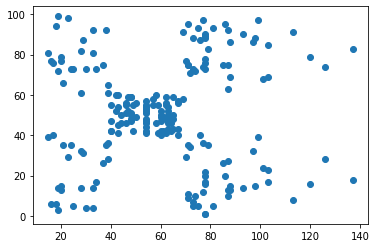

In [14]:
plt.scatter(narr[:,0],narr[:,1])

In [15]:
from sklearn.cluster import KMeans

In [16]:
km=KMeans(n_clusters=1)

In [17]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
km.predict(df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [19]:
km.inertia_

269981.28

In [29]:
wcss=[]
for i in range(1,40):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(df)
    wcss.append(km.inertia_)

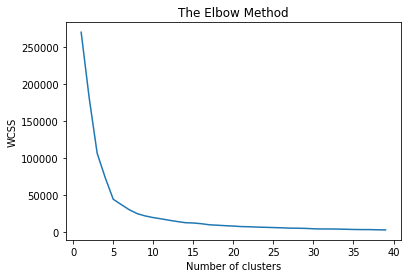

In [30]:
plt.plot(range(1, 40), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
km=KMeans(n_clusters=5,init='k-means++')
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
y=km.predict(df)

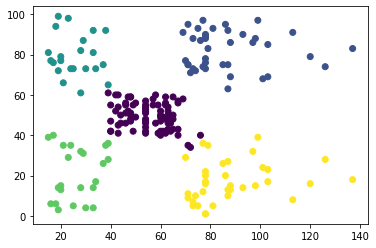

In [35]:
plt.scatter(narr[:,0],narr[:,1],c=y)

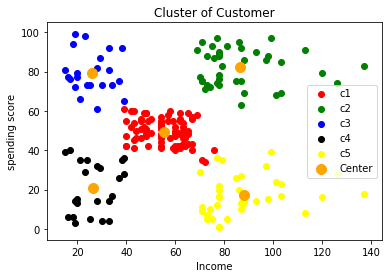

In [43]:
plt.scatter(narr[y==0,0],narr[y==0,1],c='red',label='c1')
plt.scatter(narr[y==1,0],narr[y==1,1],c='green',label='c2')
plt.scatter(narr[y==2,0],narr[y==2,1],c='blue',label='c3')
plt.scatter(narr[y==3,0],narr[y==3,1],c='black',label='c4')
plt.scatter(narr[y==4,0],narr[y==4,1],c='yellow',label='c5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='orange',label='Center',s=100)
plt.title('Cluster of Customer')
plt.xlabel('Income')
plt.ylabel('spending score')
plt.legend()
plt.show()

In [ ]:
 km.cluster_centers_

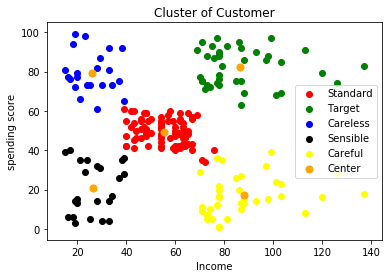

In [44]:
plt.scatter(narr[y==0,0],narr[y==0,1],c='red',label='Standard')
plt.scatter(narr[y==1,0],narr[y==1,1],c='green',label='Target')
plt.scatter(narr[y==2,0],narr[y==2,1],c='blue',label='Careless')
plt.scatter(narr[y==3,0],narr[y==3,1],c='black',label='Sensible')
plt.scatter(narr[y==4,0],narr[y==4,1],c='yellow',label='Careful')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='orange',label='Center',s=50)
plt.title('Cluster of Customer')
plt.xlabel('Income')
plt.ylabel('spending score')
plt.legend()
plt.show()

In [46]:
km.predict([[100,40]])

array([4])